In [3]:

# Define directory used by cleanup_and_merge
INPUT_DIR = "./output"

# Load data
import os
import json
from matplotlib import pyplot as plt
from collections import Counter

# Load the answers

path_to_results = os.path.join(INPUT_DIR, 'test_Results_cleaned+mintime+fullAtt.json')
with open(path_to_results, "r") as jsonRes:
    runs = json.load(jsonRes)
    jsonRes.close()

with open("../study/rawresults/test_DB_survey.json", "r") as f:
    survey = json.load(f)


In [4]:
participants = []

pid_to_survey = {p["sessionid"]: p for p in survey}

for p in runs:
    if p["attempt"] > 1:
        continue

    participant_id = p["sessionID"]
    participants.append(pid_to_survey[participant_id])

keys = set.intersection(*[set(x.keys()) for x in participants])
print(keys)


{'task', 'id', 'gender', 'age', 'sessionid', 'ctx', 'codebase', 'experience', 'origin', 'team'}


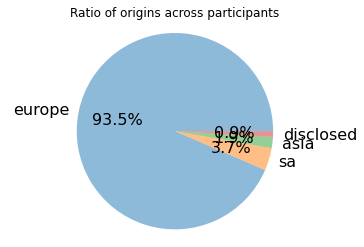

In [5]:
def compute_pie(key):
    values = [p[key] for p in participants]
    count_values = Counter(values)

    labels = count_values.keys()
    counts = [count_values[k] for k in labels]
    if key == "experience":
        labels = [">5 years", "2-5 years", "<2 years"]

    props = dict(alpha=0.5)
    fig1, ax1 = plt.subplots()
    ax1.pie(counts, labels=labels, autopct='%1.1f%%', wedgeprops=props,
            shadow=False,  textprops={'fontsize': 16})
    # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.axis('equal')

    plt.title(f"Ratio of {key}s across participants")
    # plt.savefig(f"../figures/pie_{key}.pdf")

    plt.show()


compute_pie("origin")


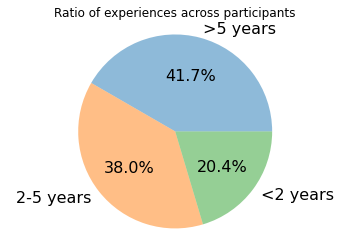

In [6]:
compute_pie("experience")


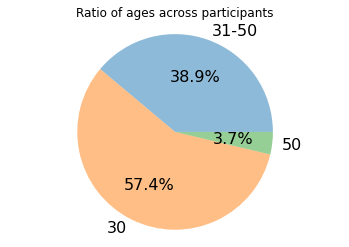

In [7]:
compute_pie("age")


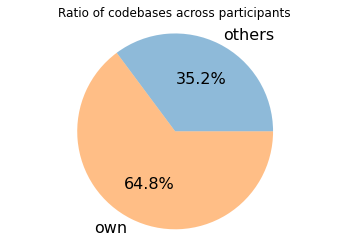

In [8]:
compute_pie("codebase")


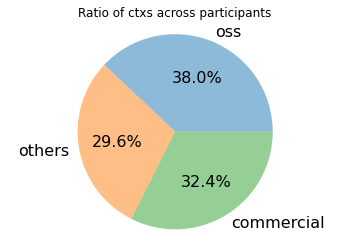

In [9]:
compute_pie("ctx")


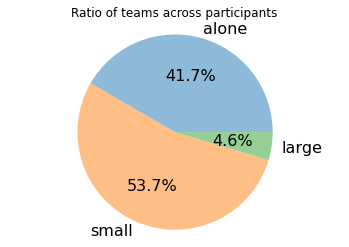

In [10]:
compute_pie("team")
